# Proyecto: Siniestro viales

La empresa bogotana de seguros SSeguro esta buscando identificar las causas de accidentalidad en las vias de Bogota, con el objetivo de tomar decisiones de mercadotecnia para reducir costos. Para esto se usaran datos de los siniestros registrados en bogota entre el año 2015 y 2020 y se hara un procesamiento de estos datos para su posterior analisis.

## Entendimiento del negocio

### Valoracion del negocio

El negocio no cuenta con información satisfactoria del comportamiento de sus clientes, es por esto que las inversiones en mercadotecnia se destinan a un publico general, por lo tanto, existe el interés de llevar a cabo una investigación que concluya con evidencia estadística sobre la  información relevante de las diferentes características  que involucran datos pertinentes de los  clientes que permita reforzar al negocio en puntos débiles que requieren una mejor atención para  obtener un ahorro de los  recursos económicos del negocio  y  a su vez ofrecer un mejor servicio. Es decir, los ingresos y egresos del negocio actual pueden ser potenciados identificando los factores que influyen en costos para el negocio.

### Objetivos de la empresa

En general, La empresa busca identificar multiples relaciones con respecto a los siniestros ocurridos en Bogota. Estas relaciones son de utilidad para identificar como distribuir los publicos objetivos, es decir, identificar que tipos de seguros son mas aptos para que tipos de vehiculos y personas. Especificamente se busca contestar a las siguientes interrogantes para determinar que desiciones tomar para mejorar la rentabilidad del negocio.

- ¿Que clase de vehiculos presentan mayor accidentalidad?

- ¿Como se comportan los accidentes en el tiempo?

- ¿Que tipo de servicio y 

### Metas del proyecto

En general, este proyecto es un primer estudio a todo lo que se busca por parte de la empresa, por lo tanto, inicialmente se quiere modelar el comportamiento de los accidentes a traves del tiempo. Despues, se tiene como objetivo poder encontrar si existe una correlación entre algunas variables, en especifico el sexo de los involucrados y el servicio del transporte (público o privado) contra la gravedad del siniestro. Es por esto que se busca contestar a las preguntas asociadas asociadas a variables categoricas de maximo 3 valores diferentes. Esto se logra realizando lo siguiente:

- Caracterizacion de la tasa de accidentalidad en el tiempo, dicha tasa estara asociada a la distribuccion de Possion que modela la probabilidad de ocurrencia de siniestros.
- Test de $\chi^2$ y correlacion tetracorica para las variables de gravedad y sexo de los siniestros.
- Test de $\chi^2$ y correlacion tetracorica para las variables de gravedad y servicio publico o privado de los siniestros.

### Planeacion

La empresa nos dio acceso a una base de datos crudos, el primer paso a seguir es el analisis exploratorio de los datos, es decir, entender las caracteristicas datos entregados a traves de su visualizacion en crudo y en graficas. Habiendo entendido los datos se procede a prepararlos para el analisis estadistico, es decir, se hace una limpieza de los datos y se hace una seleccion de los datos necesarios. Finalmente, se hace el analisis estadistico dirigido a responder las preguntar planteadas por la empresa.

## Entendimiento de los datos

La empresa entrego un excel con 5 hojas denominadas **SINIESTROS**, **ACTOR_VIAL**, **VEHICULO**, **HIPOTESIS** y **DICCIONARIO**, cada una contiene informacion diferente sobre los siniestros y la hoja **DICCIONARIO** consiste de un listado de codigos para entender la informacion dada en las otras hojas.
El archivo dado es tiene un peso de 48.6 MB, por lo tanto importar esta informacion a pandas a traves de la funcion *read_excel* toma un tiempo extenso. Para reducir tiempos, se guardo individualmente cada hoja en formato csv, el cual permite una rapida importacion de los datos.

### Adquisicion de los datos

Empezamos importando las diferentes librerias a usar para manejar los datos

In [1]:
import pandas as pd
import numpy as np
import os

Importamos los datos brindados por la empresa haciendo uso de la funcion *read_csv* que trae pandas, los datos seran almacenados en un diccionario para facilidad de manejo.

In [2]:
nombres = ['sin', 'actor', 'veh', 'hip']
df_ = {nombres[i]:pd.read_csv('siniestros_viales_'+str(i+1)+'.csv', sep=';') for i in range(len(nombres))}
Diccionario = pd.read_csv('diccionario.csv', sep=';')

Observamos el contenido de los dataframes

In [3]:
display(df_['sin'].head(2))
display(df_['actor'].head(2))
display(df_['veh'].head(2))
display(df_['hip'].head(2))

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401419,02/01/2015,13:00:00,2,4,NaN,NaN,AV AVENIDA BOYACA-CL 49A 76,6,1
1,4401420,01/01/2015,13:00:00,3,1,1.0,NaN,KR 17A-CL 63B 02,19,1


,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401419,2452497,02/01/2015,CONDUCTOR,ILESO,53,MASCULINO,4401419-1
1,4401419,2452499,02/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,36,FEMENINO,4401419-1


,CODIGO_ACCIDENTE,FECHA,VEHICULO,CLASE,SERVICIO,MODALIDAD,ENFUGA
0,4401419,02/01/2015,4401419-1,2.0,2.0,10.0,N
1,4401420,01/01/2015,4401420-1,1.0,2.0,5.0,N


,CODIGO_ACCIDENTE,FECHA,CODIGO_CAUSA
0,4401419,02/01/2015,119
1,4401420,01/01/2015,103


Observamos que los dataframes provenientes de las hojas del excel contienen diferentes variables. La primera hoja **SINIESTROS** del excel genera un dataframe que contiene las siguientes variables:

| Variable | Definición	| Valores |
| --- | --- | --- |
| CODIGO_ACCIDENTE | Codigo asociado al siniestro. | Valor tipo int. |
|FECHA| Dia, mes y año en el que ocurrio el siniestro. | Valor tipo str. |
| HORA | Hora, con exactitud de minutos, en la que ocurrio el siniestro. | Valor tipo str. |
| GRAVEDAD | Grado de gravedad del siniestro. | 1(Con muertos), 2(Con heridos), 3(Solo daños).|
| CLASE | Tipo de siniestro ocurrido.  | 1(Choque), 2(Atropello), 3(Volcamiento), 4(Caida de ocupante), 5(Incendio), 6(Otro), 7(Autolesion). |
| CHOQUE | Elementos involucrados en el choque. | 1(Vehiculo), 2(Tren), 3(Semoviente), 4(Objeto fijo).|
| OBJETIVO_FIJO | Elemento inmovil contra el que ocurrio el siniestro. | 1(Muro), 2(Poste), 3(Arbol), 4(Barandas), 5(Semaforo), 6(Inmueble), 7(Hidrante), 8(Valla, Señal), 9(Tarima, Caseta), 10(Vehiculo estacionado), 11(Otro).|
|DIRECCION| Direccion donde ocurrio el siniestro. | Variable tipo str. |
|CODIGO_LOCALIDAD| Codigo asociado a la localidad donde ocurrio el siniestro. | 1(Usaquén), 2(Chapinero), 3(Santa Fe), 4(San Cristóbal), 5(Usme), 6(Tunjuelito), 7(Bosa), 8(Kennedy), 9(Fontibón), 10(Engativá), 11(Suba), 12(Barrios Unidos), 13(Teusaquillo), 14(Los Mártires), 15(Antonio Nariño), 16(Puente Aranda), 17(La Candelaria), 18(Rafael Uribe Uribe), 19(Ciudad Bolivar), 20(Sumapaz).|
|DISENO_LUGAR| Tipo de lugar en el que ocurrio el siniestro. | 1(Tramo de via), 2(Intersección), 3(Via peatonal), 4(Paso elevado), 5(Paso inferior), 6(Paso a nivel), 7(Glorieta), 8(Puente), 9(Via troncal), 10(Lote o predio), 11(Cicloruta), 12(Ponton), 13(Tunel).|

La segunda hoja **ACTOR_VIAL** del excel, genera el dataframe que contiene las siguientes variables:

|Variable|Definición|Valores|
|---|---|---|
|CODIGO_ACCIDENTE| Codigo asociado al accidente. | Valor tipo int. |
|CODIGO_ACCIDENTADO| Codigo asociado al paciente accidentado. | Valor tipo str. |
|FECHA|  Dia, mes y año en el que ocurrio el siniestro. | Valor tipo str. |
|CONDICION| Clasificacion del tipo de actor que es el individuo en el siniestro. | CONDUCTOR, PASAJERO/ACOMPAÑATE, PEATON, CICLISTA, MOTOCICLISTA. |
|ESTADO| Condicion del individuo involucrado en el siniestro. |  HERIDO, ILESO, MUERTO |
|EDAD| Edad del individuo. | Variable tipo int. |
|SEXO| Sexo del individuo. | MASCULINO, FEMENINO, SIN INFORMACION |
|VEHICULO| Codigo asociado al vehiculo en el que se encontraba el vehiculo. | Variable tipo str, vacio si no se encontraba dentro de un vehiculo. |

La tercer hoja **VEHICULOS** del excel, produce un dataframe con las siguientes variables:

|Variable|Definición|Valores|
|---|---|---|
|CODIGO_ACCIDENTE| Codigo asociado al accidente. | Valor tipo int. |
|FECHA| Dia, mes y año en el que ocurrio el siniestro. | Valor tipo str. |
|VEHICULO| Codigo del vehiculo involucrado en el siniestro. | Valor tipo str. |
|CLASE| Tipo de vehiculo involucrado en el accidente. | 1(Automovil), 2(Bus), 3(Buseta), 4(Camion, Furgon), 5(Camioneta), 6(Campero), 7(Microbus), 8(Tractocamion), 9(Volqueta), 10(Motocicleta), 11(Maquina Agricola), 12(Maquina Industrial), 13(Bicicleta), 14(Motocarro), 15(Traccion animal), 16(Otro), 17(Motociclo), 18(No identificado), 19(Bus Articulado), 20(Bus Alimentador), 21(Tren), 22(Ambulancia), 23(Metro), 24(Cuatrimoto), 25(Remolque), 26(Semi-Remolque), 27(Bus Bi-Articulado).|
|SERVICIO| Tipo de servicio prestado por el vehiculo involucrado. |0(Sin informacion), 1(Oficial), 2(Publico), 3(Particular), 4(Diplomatico).|
|MODALIDAD| Modalidad de carga/pasajeros presentes en el vehiculo. |1(Mixto), 2(Carga - Extrapesada), 3(Carga - Extradimensionada), 4(Pasajeros - Colectivo), 5(Pasajeros - Individual), 6(Pasajeros - Especial escolar), 7(Pasajeros - Especial turismo), 8(Pasajeros - Especial asalariado), 9(Pasajeros - Especial Ocasional), 10(Pasajeros - Masivo), 11(Carga - Pesada), 12(Carga - Mercancia Peligrosa).|
|ENFUGA| El vehiculo se encuentra en fuga del siniestro. | N(No), S(Si)|

La cuarta hoja **HIPOTESIS** del excel contiene las siguientes variables:

|Variable|Definición|Valores|
|---|---|---|
|CODIGO_ACCIDENTE| Codigo asociado al accidente. | Valor tipo int.|
|FECHA| Dia, mes y año en el que ocurrio el siniestro. | Valor tipo str. |
|CODIGO_CAUSA| Codigo asociado a la hipotesis de la causa del sinietro. | Valor tipo int. |

Finalmente, la ultima hoja **DICCIONARIO** contiene un diccionario que permite entender los codigos presentados en las hojas anteriores, por lo tanto el dataframe importado contiene lo siguiente:

|Variable|Definición|Valores|
|---|---|---|
|HOJA| Hoja a la que esta asociado el codigo. |SINIESTROS, ACTOR_VIAL, VEHICULOS, HIPOTESIS|
|CAMPO| Variable de la hoja a la que se encuentra asociada el codigo. |GRAVEDAD, CLASE, CHOQUE, OBJETO_FIJO, CODIGO_LOCALIDAD, DISENO_LUGAR, SERVICIO, MODALIDAD, CODIGO_CAUSA|
|CODIGO|Numero dado para el campo a describir. |Valor tipo int.|
|DESCRIPCION| Interpretacion del codigo dado en el respectivo campo. |Valor tipo str.|

Continuando con el entendimiento de los datos, cabe notar que el dataframe con lo siniestros contiene un listado de los siniestros, identificando cada uno con un unico codigo de accidente. Lo interesante es que para un siniestro podemos encontrar multiples actores viales y vehiculos, es por esto que en los dataframes de actores viales y vehiculos cuentan con datos que repiten el codigo de accidente. Un ejemplo de esto lo encontramos asociado al codigo de accidente ***4401436***, para el cual tenemos los siguientes datos del siniestro, los actores viales y los vehiculos involucrados respectivamente:

In [4]:
display(df_['sin'][df_['sin'].CODIGO_ACCIDENTE==4401436])
display(df_['actor'][df_['actor'].CODIGO_ACCIDENTE==4401436])
display(df_['veh'][df_['veh'].CODIGO_ACCIDENTE==4401436])

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
17,4401436,02/01/2015,11:00:00,2,1,1.0,NaN,CL 68B-KR 72A 02,10,1


,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
39,4401436,2452538,02/01/2015,CONDUCTOR,ILESO,33,FEMENINO,4401436-1
40,4401436,2452539,02/01/2015,CONDUCTOR,HERIDO,20,MASCULINO,4401436-2
41,4401436,2452541,02/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,39,FEMENINO,4401436-1
42,4401436,2452542,02/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,63,MASCULINO,4401436-1
43,4401436,2452543,02/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,35,FEMENINO,4401436-1
44,4401436,2452544,02/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,43,MASCULINO,4401436-1


,CODIGO_ACCIDENTE,FECHA,VEHICULO,CLASE,SERVICIO,MODALIDAD,ENFUGA
30,4401436,02/01/2015,4401436-1,2.0,2.0,10.0,N
31,4401436,02/01/2015,4401436-2,4.0,2.0,11.0,N


Esta observacion va a ser de suma importancia para la preparacion de los datos.

## Preparacion de los datos

De los datos, lo primero que notamos es que dos variables (**CLASE**), con diferentes definiciones, coinciden en nombre para diferentes dataframes, por lo tanto es necesario renombrar dichas variables:

In [5]:
df_['sin'] = df_['sin'].rename(columns={'CLASE':'CLASE_SINIESTRO'})
df_['veh'] = df_['veh'].rename(columns={'CLASE':'CLASE_VEHICULO'})

Posterior a esto, el objetivo principal en esta etapa es generar un unico dataframe que contenga la misma informacion que los anteriores, para esto usamos la funcion *merge* de pandas, almacenando toda la informacion en el dataframe ``` df ```. El merge de los datos se hara de forma *outer* entorno al codigo del accidente, la fecha, y el vehiculo involucrado:

In [6]:
df = pd.merge(df_['sin'], df_['hip'], on=["CODIGO_ACCIDENTE", "FECHA"], how="outer")
df = pd.merge(df, df_['veh'], on=["CODIGO_ACCIDENTE", "FECHA"], how="outer")
df = pd.merge(df, df_['actor'], on=["CODIGO_ACCIDENTE", "VEHICULO", "FECHA"], how="outer")

Veamos informacion sobre el nuevo dataframe creado

In [7]:
df.head(3)

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE_SINIESTRO,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,...,VEHICULO,CLASE_VEHICULO,SERVICIO,MODALIDAD,ENFUGA,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO
0,4401419,02/01/2015,13:00:00,2.0,4.0,NaN,NaN,AV AVENIDA BOYACA-CL 49A 76,6.0,1.0,...,4401419-1,2.0,2.0,10.0,N,2452497.0,CONDUCTOR,ILESO,53,MASCULINO
1,4401419,02/01/2015,13:00:00,2.0,4.0,NaN,NaN,AV AVENIDA BOYACA-CL 49A 76,6.0,1.0,...,4401419-1,2.0,2.0,10.0,N,2452499.0,PASAJERO/ACOMPAÑANTE,HERIDO,36,FEMENINO
2,4401420,01/01/2015,13:00:00,3.0,1.0,1.0,NaN,KR 17A-CL 63B 02,19.0,1.0,...,4401420-1,1.0,2.0,5.0,N,2452504.0,CONDUCTOR,ILESO,27,MASCULINO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502226 entries, 0 to 502225
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CODIGO_ACCIDENTE    502226 non-null  int64  
 1   FECHA               502226 non-null  object 
 2   HORA                478759 non-null  object 
 3   GRAVEDAD            478759 non-null  float64
 4   CLASE_SINIESTRO     478759 non-null  float64
 5   CHOQUE              432936 non-null  float64
 6   OBJETO_FIJO         12275 non-null   float64
 7   DIRECCION           478759 non-null  object 
 8   CODIGO_LOCALIDAD    478759 non-null  float64
 9   DISENO_LUGAR        478759 non-null  float64
 10  CODIGO_CAUSA        478041 non-null  object 
 11  VEHICULO            478625 non-null  object 
 12  CLASE_VEHICULO      474966 non-null  float64
 13  SERVICIO            457211 non-null  float64
 14  MODALIDAD           188410 non-null  float64
 15  ENFUGA              478605 non-nul

Observamos que el dataframe contiene una gran cantidad de elementos nulos, es por esto que debemos identificar que datos se pueden rellenar y cuales de deben descartar.


Retomando lo mencionado en el entendimiento de los datos, para un cierto siniestro encontramos diferentes actores viales y vehiculos involucradas, es por esto que en el nuevo dataframe encontramos multiples veces los diferentes codigos de accidentes, esto gracias al *merge* y la informacion resgitrada sobre los siniestro. Como en el ejemplo ya mostrado, veamos los datos asociados al codigo ***4401436***:

In [9]:
df[df.CODIGO_ACCIDENTE==4401436]

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE_SINIESTRO,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,...,VEHICULO,CLASE_VEHICULO,SERVICIO,MODALIDAD,ENFUGA,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO
40,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-1,2.0,2.0,10.0,N,2452538.0,CONDUCTOR,ILESO,33,FEMENINO
41,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-1,2.0,2.0,10.0,N,2452541.0,PASAJERO/ACOMPAÑANTE,HERIDO,39,FEMENINO
42,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-1,2.0,2.0,10.0,N,2452542.0,PASAJERO/ACOMPAÑANTE,HERIDO,63,MASCULINO
43,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-1,2.0,2.0,10.0,N,2452543.0,PASAJERO/ACOMPAÑANTE,HERIDO,35,FEMENINO
44,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-1,2.0,2.0,10.0,N,2452544.0,PASAJERO/ACOMPAÑANTE,HERIDO,43,MASCULINO
45,4401436,02/01/2015,11:00:00,2.0,1.0,1.0,NaN,CL 68B-KR 72A 02,10.0,1.0,...,4401436-2,4.0,2.0,11.0,N,2452539.0,CONDUCTOR,HERIDO,20,MASCULINO


Observamos entonces que la informacion de dicho siniestro contiene la informacion de cada actor vial presente y la informacion relacionada a este. Con esto en mente podemos agrupar los datos por el codigo de accidente y rellenar datos generales que sean intrínsecos del siniestro. Por ejemplo, la hora en la que ocurrio el siniestro es especifica del siniestro e independiete del actor vial, es por esto que para todos los involucrados la hora debe ser igual.

Para cumplir el objetivo de completar datos podemos definir las siguiente funcion:

In [10]:
def fill_cols(df, cols, grupo):
    """
    Llena los datos vacios de las columnas indicadas por el metodo ffill, 
    agrupando los datos por la caracteristica indicada.
    Parametros:
        df: Un dataframe de Pandas.
        cols: Lista con cadenas de texto de los nombres de las columnas.
        grupo: Cadena de texto con el nombre de la caracteristica por la cual agrupar.
    Retorna:
        Un dataframe en el que los datos vacios de las columnas indicadas se llenan por el metodo ffill.
    """
    df[cols] = df.groupby(grupo)[cols].ffill()
    return df

La cual se encargan de llenar datos vacios. Esta funcion recibe como parametro un dataframe ```df```, las columnas ```cols``` a rellenar y la variable ```group``` que indica que informacion usar para agrupar los datos, y retorna el dataframe modificado.

In [11]:
columnas = ['HORA', 'GRAVEDAD', 'CLASE_SINIESTRO', 'CHOQUE', 'OBJETO_FIJO', 'DIRECCION', 'CODIGO_LOCALIDAD', 'DISENO_LUGAR', 'CODIGO_CAUSA', 'ENFUGA']
df = fill_cols(df, columnas, 'CODIGO_ACCIDENTE')

Con este cambio, obtengamos nuevamente informacion sobre el dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502226 entries, 0 to 502225
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CODIGO_ACCIDENTE    502226 non-null  int64  
 1   FECHA               502226 non-null  object 
 2   HORA                502226 non-null  object 
 3   GRAVEDAD            502226 non-null  float64
 4   CLASE_SINIESTRO     502226 non-null  float64
 5   CHOQUE              434819 non-null  float64
 6   OBJETO_FIJO         12551 non-null   float64
 7   DIRECCION           502226 non-null  object 
 8   CODIGO_LOCALIDAD    502226 non-null  float64
 9   DISENO_LUGAR        502226 non-null  float64
 10  CODIGO_CAUSA        501469 non-null  object 
 11  VEHICULO            478625 non-null  object 
 12  CLASE_VEHICULO      474966 non-null  float64
 13  SERVICIO            457211 non-null  float64
 14  MODALIDAD           188410 non-null  float64
 15  ENFUGA              502072 non-nul

Notamos entonces que las variables relacionadas directamente al siniestro ya no presentan datos nulos.

Ahora, un paso importante va a ser modificar las columnas **FECHA** y **HORA**, para generar una nueva columna que contenga esa informacion en una variable tipo *datetime*.

Para esto debemos identificar primero como el tipo de variable que se encuentra almacenado en dichas columnas:

In [13]:
df.dtypes

CODIGO_ACCIDENTE        int64
FECHA                  object
HORA                   object
GRAVEDAD              float64
CLASE_SINIESTRO       float64
CHOQUE                float64
OBJETO_FIJO           float64
DIRECCION              object
CODIGO_LOCALIDAD      float64
DISENO_LUGAR          float64
CODIGO_CAUSA           object
VEHICULO               object
CLASE_VEHICULO        float64
SERVICIO              float64
MODALIDAD             float64
ENFUGA                 object
CODIGO_ACCIDENTADO    float64
CONDICION              object
ESTADO                 object
EDAD                   object
SEXO                   object
dtype: object

In [14]:
type(df.loc[0,'FECHA']), type(df.loc[0,'HORA'])

(str, str)

La fecha y hora estan almacenadas como objetos, en este caso, al obtener el tipo de los primero datos, dichos objetos son cadenas de texto. Por lo tanto la ruta que vamos a seguir es concatenar dichas cadenas y convertirlos a tipo *datetime* usando la funcion *to_datetime* que ofrece pandas. Estas variables seran almacenadas en la columna **FECHA** y eliminaremos la columna **HORA**.

In [15]:
df['FECHA'] = pd.to_datetime(df.FECHA + ' '+ df.HORA, format="%d/%m/%Y %H:%M:%S")
df.drop(columns=['HORA'], axis=1, inplace=True)
df.FECHA

0        2015-01-02 13:00:00
1        2015-01-02 13:00:00
2        2015-01-01 13:00:00
3        2015-01-01 13:00:00
4        2015-01-02 11:15:00
                 ...        
502221   2020-11-09 11:11:00
502222   2020-11-27 13:50:00
502223   2020-12-06 02:20:00
502224   2020-01-13 09:40:00
502225   2020-06-06 02:31:00
Name: FECHA, Length: 502226, dtype: datetime64[ns]

Por otro lado, la variable **OBJETO_FIJO** presenta valores vacios si el siniestro no ocurrio con algun objeto fijo, por lo tanto todos datos vacios de esta columna pueden considerarse bajo un nuevo valor 0 que indica un siniestro sin objetos fijos involucrados. De igual forma, los valores vacios de la columna **CODIGO_CAUSA** se llenan con ceros indicando que no se desconoce la hipotesis.

In [16]:
df['OBJETO_FIJO'].fillna(0, inplace=True)
df['CODIGO_CAUSA'].fillna(0, inplace=True)

Muchos de los siniestros no cuentan con informacion de los vehiculos involucrados, ya sea por que no aplica o porque este se encuentra en fuga. Como consecuencia de esto, los valores vacios de las columnas **CLASE_VEHICULO**, **SERVICIO** y **MODALIDAD**, se llenaran con 0 indicando que se trata de que esta caracteristica no aplica (ej. es un peaton) o si no hay registro de este por estado de fuga.

In [17]:
df.loc[df.CONDICION=='PEATON', ['CLASE_VEHICULO', 'SERVICIO', 'MODALIDAD']] = 0
df.loc[df.ENFUGA=='S', ['CLASE_VEHICULO', 'SERVICIO', 'MODALIDAD']] = 0

De igual forma, para los ciclistas y los bicitaxistas las variables **SERVICIO** y **MODALIDAD** tampoco aplican o se desconocen.

In [18]:
df.loc[df.CLASE_VEHICULO == 13, ['SERVICIO', 'MODALIDAD']] = 0
df.loc[df.CLASE_VEHICULO == 28, ['SERVICIO', 'MODALIDAD']] = 0

Para la variable **CHOQUE**, se deben agrupar los datos por el codigo de accidente, y los datos vacios de esta variable se llenan con 5 si alguno de los elementos del grupo es un peaton y 0 si no, esto debido a que en los datos entregados, si el choque ocurria contra algun peaton o el siniestro no fue causa de un choque, la columna de choques no registra valor.

In [19]:
condicion = lambda dfg: True if any(dfg=='PEATON') else False
cond = df.groupby('CODIGO_ACCIDENTE')['CONDICION'].transform(condicion)
df['CHOQUE'].fillna(cond.map({True: 5, False: 0}), inplace=True)

Eliminamos los datos que despues del preprocesamiento contienen multiples valores vacios.

In [20]:
df.drop(df[df['CONDICION'].isna()].index, inplace=True)
df.drop(df[df.CLASE_VEHICULO.isna()].index, inplace=True)

La variable **CODIGO_CAUSA** contiene valores no numericos, de la siguiente forma:

In [21]:
df[~df['CODIGO_CAUSA'].astype(str).str.isdigit()].head(2)

,CODIGO_ACCIDENTE,FECHA,GRAVEDAD,CLASE_SINIESTRO,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_CAUSA,VEHICULO,CLASE_VEHICULO,SERVICIO,MODALIDAD,ENFUGA,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO
801,4401761,2015-01-07 18:30:00,2.0,2.0,5.0,0.0,CL 60-KR 22B 55,19.0,1.0,ANT-139,4401761-1,10.0,3.0,NaN,N,2453250.0,MOTOCICLISTA,HERIDO,15,FEMENINO
72250,4431310,2015-12-05 05:10:00,2.0,1.0,1.0,0.0,CL 6A-KR 88D 60,8.0,1.0,ANT-139,4431310-1,5.0,3.0,NaN,N,2516865.0,CONDUCTOR,ILESO,35,MASCULINO


Este termino *ANT* encontrado en **CODIGO_CAUSA** esta asociado a , por lo tanto, vamos a conservar el codigo de la hipotesis extrayendo la parte numerica de la cadena de texto.

In [22]:
df['CODIGO_CAUSA'] = df.CODIGO_CAUSA.astype(str).transform(lambda val: ''.join(filter(str.isdigit, val))).astype(int)

Por ultimo, las variable categoricas las convertimos a valores numericos para trabajar un analisis estadistico de estas. Para esto definimos la funcion ```categorias```, la cual genera un diccionario que nos permitira identificar cada valor categorico con un entero.

In [24]:
def categorias(df, col):
    """
    Crea un diccionario asociando un valor entero a cada valor categorico de la columna,
    en el dataframe df.
    Parametros:
        df: Un dataframe de Pandas.
        col: Cadena de texto del nombre de las columna.
    Retorna:
        Un diccionario en el que cada nombre tiene asociado un entero.
    """
    nombres = np.array(df[col].value_counts().index)
    return {nombres[i]:i+1 for i in range(len(nombres))}

In [25]:
variables = ['CONDICION', 'ESTADO', 'SEXO', 'ENFUGA']
for variable in variables:
    dic = categorias(df, variable)
    df[variable].replace(dic, inplace=True)
    print(dic)


{'CONDUCTOR': 1, 'MOTOCICLISTA': 2, 'PASAJERO/ACOMPAÑANTE': 3, 'PEATON': 4, 'CICLISTA': 5}
{'ILESO': 1, 'HERIDO': 2, 'MUERTO': 3}
{'MASCULINO': 1, 'FEMENINO': 2, 'SIN INFORMACION': 3}
{'N': 1, 'S': 2}


Finalmente, el dataframe  resultante contiene las siguientes variables:

| Variable | Definición	| Valores |
| --- | --- | --- |
| CODIGO_ACCIDENTE | Codigo asociado al siniestro. | Valor tipo int. |
|FECHA| Dia, mes, año, hora, minuto y segundo en el que ocurrio el siniestro. | Valor tipo datetime. |
| GRAVEDAD | Grado de gravedad del siniestro. | 1(Con muertos), 2(Con heridos), 3(Solo daños).|
| CLASE_SINIESTRO | Tipo de siniestro ocurrido.  | 1(Choque), 2(Atropello), 3(Volcamiento), 4(Caida de ocupante), 5(Incendio), 6(Otro), 7(Autolesion). |
| CHOQUE | Elementos involucrados en el choque. | 0(No hubo choque), 1(Vehiculo), 2(Tren), 3(Semoviente), 4(Objeto fijo), 5(Peaton). |
| OBJETIVO_FIJO | Elemento inmovil contra el que ocurrio el siniestro. | 0(No hubo choque contra un objeto fijo), 1(Muro), 2(Poste), 3(Arbol), 4(Barandas), 5(Semaforo), 6(Inmueble), 7(Hidrante), 8(Valla, Señal), 9(Tarima, Caseta), 10(Vehiculo estacionado), 11(Otro).|
|DIRECCION| Direccion donde ocurrio el siniestro. | Variable tipo str. |
|CODIGO_LOCALIDAD| Codigo asociado a la localidad donde ocurrio el siniestro. | 1(Usaquén), 2(Chapinero), 3(Santa Fe), 4(San Cristóbal), 5(Usme), 6(Tunjuelito), 7(Bosa), 8(Kennedy), 9(Fontibón), 10(Engativá), 11(Suba), 12(Barrios Unidos), 13(Teusaquillo), 14(Los Mártires), 15(Antonio Nariño), 16(Puente Aranda), 17(La Candelaria), 18(Rafael Uribe Uribe), 19(Ciudad Bolivar), 20(Sumapaz).|
|DISENO_LUGAR| Tipo de lugar en el que ocurrio el siniestro. | 1(Tramo de via), 2(Intersección), 3(Via peatonal), 4(Paso elevado), 5(Paso inferior), 6(Paso a nivel), 7(Glorieta), 8(Puente), 9(Via troncal), 10(Lote o predio), 11(Cicloruta), 12(Ponton), 13(Tunel).|
|CODIGO_CAUSA| Codigo asociado a la hipotesis de la causa del sinietro. | Valor tipo int. |
|VEHICULO| Codigo del vehiculo involucrado en el siniestro. | Valor tipo str. |
|CLASE_VEHICULO| Tipo de vehiculo involucrado en el accidente. | 0(Peaton), 1(Automovil), 2(Bus), 3(Buseta), 4(Camion, Furgon), 5(Camioneta), 6(Campero), 7(Microbus), 8(Tractocamion), 9(Volqueta), 10(Motocicleta), 11(Maquina Agricola), 12(Maquina Industrial), 13(Bicicleta), 14(Motocarro), 15(Traccion animal), 16(Otro), 17(Motociclo), 18(No identificado), 19(Bus Articulado), 20(Bus Alimentador), 21(Tren), 22(Ambulancia), 23(Metro), 24(Cuatrimoto), 25(Remolque), 26(Semi-Remolque), 27(Bus Bi-Articulado).|
|SERVICIO| Tipo de servicio prestado por el vehiculo involucrado. |0(Sin informacion), 1(Oficial), 2(Publico), 3(Particular), 4(Diplomatico).|
|MODALIDAD| Modalidad de carga/pasajeros presentes en el vehiculo. |1(Mixto), 2(Carga - Extrapesada), 3(Carga - Extradimensionada), 4(Pasajeros - Colectivo), 5(Pasajeros - Individual), 6(Pasajeros - Especial escolar), 7(Pasajeros - Especial turismo), 8(Pasajeros - Especial asalariado), 9(Pasajeros - Especial Ocasional), 10(Pasajeros - Masivo), 11(Carga - Pesada), 12(Carga - Mercancia Peligrosa).|
|ENFUGA| El vehiculo se encuentra en fuga del siniestro. | 1(No), 2(Si)|
|CODIGO_ACCIDENTADO| Codigo asociado al paciente accidentado. | Valor tipo str. |
|CONDICION| Clasificacion del tipo de actor que es el individuo en el siniestro. | 1(CONDUCTOR), 2(MOTOCICLISTA), 3(PASAJERO/ACOMPAÑATE), 4(PEATON), 5(CICLISTA). |
|ESTADO| Condicion del individuo involucrado en el siniestro. |  1(ILESO), 2(HERIDO), 3(MUERTO) |
|EDAD| Edad del individuo. | Variable tipo int. |
|SEXO| Sexo del individuo. | 1(MASCULINO), 2(FEMENINO), 3(SIN INFORMACION) |

## Analisis de datos

Empezamos este componente importando las librerias a usar para el analisis estadistico y la visualizacion de los datos.

In [26]:
#Paquetes para el analisis estadistico

import scipy as sp
from scipy import stats
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.stats import poisson

#Paquetes para la visualizaciones estadisticas e interactivas

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#Indicamos a pandas que las visualizaciones se contruiran en Plotly y estableciendo seaborn por defecto

pd.options.plotting.backend = "plotly"
sns.set()

Definimos un nuevo dataframe ```df_est```, en el cual eliminamos las variables que son cadenas de texto o sirven como identificacion. Esto para poder trabajar con las variables categoricas numericas.

In [27]:
df_est = df.drop(['CODIGO_ACCIDENTE', 'DIRECCION', 'CODIGO_ACCIDENTADO', 'VEHICULO', 'MODALIDAD'], axis=1)
df_est.dtypes

FECHA               datetime64[ns]
GRAVEDAD                   float64
CLASE_SINIESTRO            float64
CHOQUE                     float64
OBJETO_FIJO                float64
CODIGO_LOCALIDAD           float64
DISENO_LUGAR               float64
CODIGO_CAUSA                 int32
CLASE_VEHICULO             float64
SERVICIO                   float64
ENFUGA                       int64
CONDICION                    int64
ESTADO                       int64
EDAD                        object
SEXO                         int64
dtype: object

Observemos la estadistica descriptiva asociada a los datos.

In [28]:
df_est.describe()

,FECHA,GRAVEDAD,CLASE_SINIESTRO,CHOQUE,OBJETO_FIJO,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_CAUSA,CLASE_VEHICULO,SERVICIO,ENFUGA,CONDICION,ESTADO,SEXO
count,501967,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000,501967.000000
mean,2017-11-26 00:33:18.273592064,2.584827,1.203079,1.438897,0.154247,9.297358,1.426480,147.693789,4.024390,2.299677,1.016649,1.542295,1.241667,1.197925
min,2015-01-01 01:05:00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2016-06-30 11:15:00,2.000000,1.000000,1.000000,0.000000,6.000000,1.000000,112.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2017-11-23 15:30:00,3.000000,1.000000,1.000000,0.000000,9.000000,1.000000,121.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,2019-04-16 08:30:00,3.000000,1.000000,1.000000,0.000000,13.000000,1.000000,145.000000,6.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,2020-12-31 22:34:00,3.000000,7.000000,5.000000,16.000000,20.000000,13.000000,506.000000,28.000000,4.000000,2.000000,5.000000,3.000000,3.000000
std,NaN,0.526549,0.622049,1.289903,1.142773,5.008516,1.250823,79.832934,3.759828,0.906950,0.127951,1.033670,0.444330,0.453211


El ojetivo ahora es poder obtener un analisis estadistico de los datos, dado que son variables categoricas, el poceso de analisis de correlaciones y de regresiones difiere del tratamiento a variables continuas. Un ejemplo lo observamos en las siguientes graficas y en la visualizacion de la matriz de correlacion.

c:\Users\juan1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


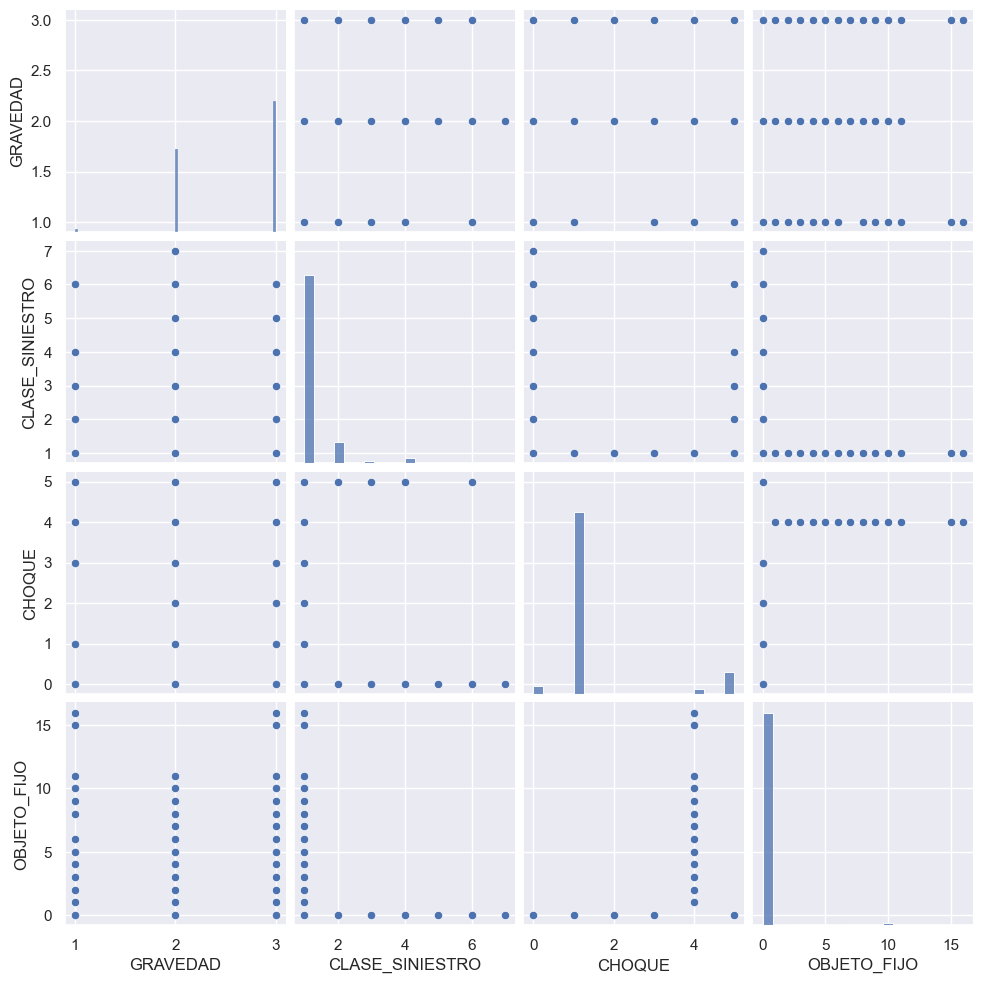

In [29]:
sns.pairplot(data= df_est.iloc[:,1:5])

<Axes: >

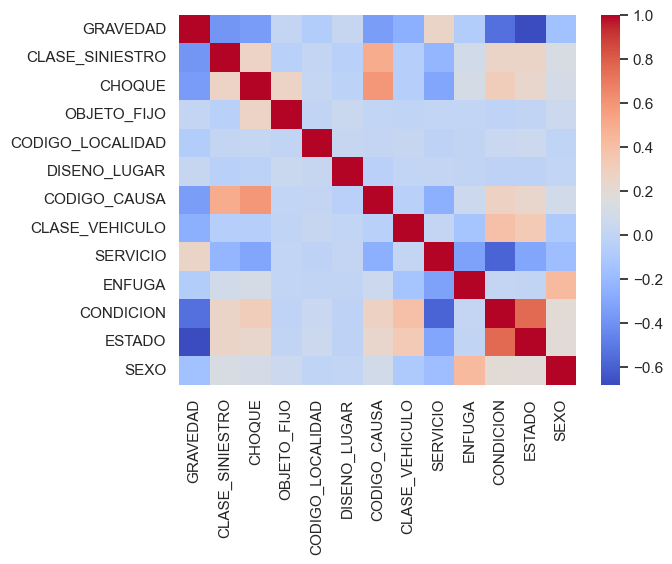

In [30]:
corr = df_est.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')

Con esto notamos que no existen muchas correlaciones significativas dentro del dataframe, y el proceso de generar una regresion lineal o multilineal no es muy fructuosa dado que las variables no presentan comportamientos de este tipo. Podemos empezar el analisis bajo series de temporales de la ocurrencia de siniestros, el resultado de esto se espera sea la caracterizacion de las ocurrencias bajo una distribucion de Poisson, con una tasa dependiente del tiempo.

#### Ajuste distribucion de Poisson

Observemos como se comportan la cantidad de accidentes por dia para el año 2015:

In [31]:
accidente_hora = df.groupby(df_est[(df_est.FECHA.dt.year == 2015)].FECHA.dt.day).count().FECHA
accidente_hora.plot(kind='bar')

Notamos un valor mas o menos constante, por lo tanto, la idea es modelar una tasa de siniestros diarios que dependa del mes, es decir que para cada mes contaremos con una tasa de accidentes diarion promedio. Para esto observemos primero como se comportan los siniestros diarios para el mes de enero y diciembre del año 2015.

In [32]:
accidente_hora = df.groupby(df_est[(df_est.FECHA.dt.year == 2015) & (df_est.FECHA.dt.month==1)].FECHA.dt.day).count().FECHA
accidente_hora.plot(kind='bar')

In [33]:
accidente_hora = df.groupby(df_est[(df_est.FECHA.dt.year) & (df_est.FECHA.dt.month==12)].FECHA.dt.day).count().FECHA
accidente_hora.plot(kind='bar')

Como esta cantidad se mantiene lo suficientemente estable, el siguiente paso es obtener un promedio de accidentes diarios por mes, esto se logra con la siguiente funcion:

In [34]:
def prom_año(df, año):
    """
    Retorna el promedio de siniestros diarios para cada mes del año indicado,
    tomando la infomacion del dataframe df.
    Parametros:
        df: Dataframe con la informacion.
        año: Año al cual obtener los promedios para cada mes.
    Retorna:
        meses: Lista de los meses por su representacion numerica (ej. 2 para febrero).
        prom: Lista de los promedios para cada mes en orden cronologico.
    """
    prom = []
    df_ = df[df.FECHA.dt.year==año]
    meses = df_.FECHA.dt.month.value_counts().sort_index().index.values
    for i in meses:
        df_mes = df_[df_.FECHA.dt.month==i].FECHA
        prom.append(df_mes.groupby(df_mes.dt.day).count().mean())
    return meses, prom

Con esto generamos un plot para el promedio de siniestros diarios por mes para cada uno de los años en el dataframe.

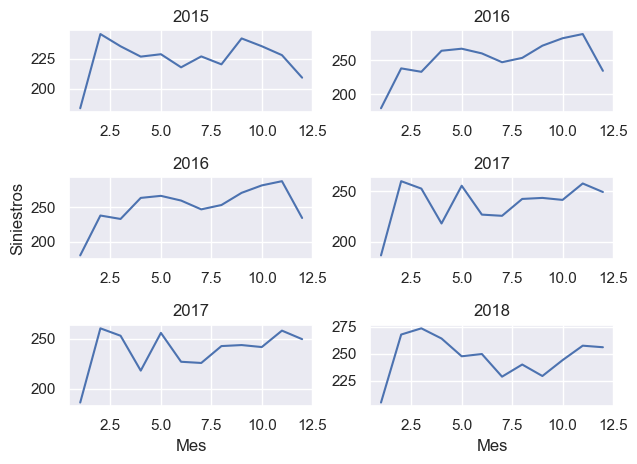

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2)
años = df_est.FECHA.dt.year.value_counts().sort_index().index.values
for i in range(3):
    for j in range(2):
        meses, prom = prom_año(df_est, años[i+j])
        axes[i,j].plot(meses, prom)
        axes[i,j].set_title(str(años[i+j]))
axes[2,0].set_xlabel('Mes')
axes[2,1].set_xlabel('Mes')
axes[1,0].set_ylabel('Siniestros')
plt.tight_layout()

Notamos un comportamiento recurrente en esta tasa, este comportamiento lo ajustaremos a una exponencial inversa, pero antes se debe hacer un promedio por años para cada mes, resultando con lo siguiente:

Text(0, 0.5, 'Promedio siniestros diarios')

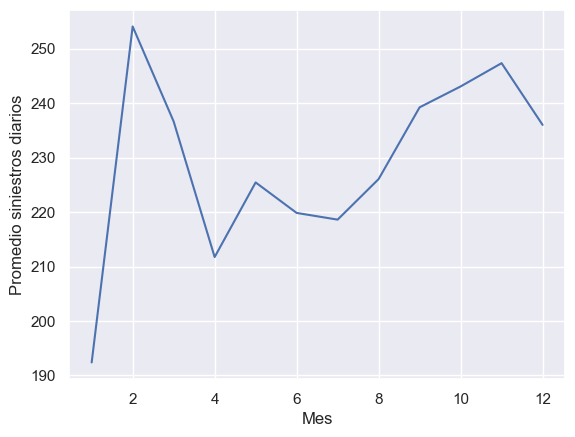

In [36]:
total_meses = pd.DataFrame(np.array([prom_año(df_est, año)[1] for año in años]).T,index=[i for i in range(1,13)], columns=años)
prom_año_total = total_meses.T.mean()
sns.lineplot(prom_año_total)
plt.xlabel('Mes')
plt.ylabel('Promedio siniestros diarios')

Ahora si se hace el ajuste deseado, iniciamos definiendo la funcion a la que se le va a hacer el ajuste:

In [37]:
def exp_inv(x, a, b):
    """
    Retorna los valores para la funcion f(x)= a - b*exp(-x), de acuerdo a los parametros a y b dados
    en los valores del x dado.
        Parametros:
        x: Valores sobre el cual evaluar la funcion.
        a: Parametro de la funcion.
        b: Coeficiente de la funcion.
    Retorna:
        resultado: Resultado de evaluar la funcion para los valores de x y los parametros dados.
    """
    resultado = a - b*np.exp(-x)
    return resultado

Y procedemos a realizar el ajuste por medio de la funcion `curve_fit` que incluye scipy:

f(x) = 233.0360979962141 - 79.33673202569406*exp(x)


Text(0, 0.5, 'Promedio de siniestros por dia')

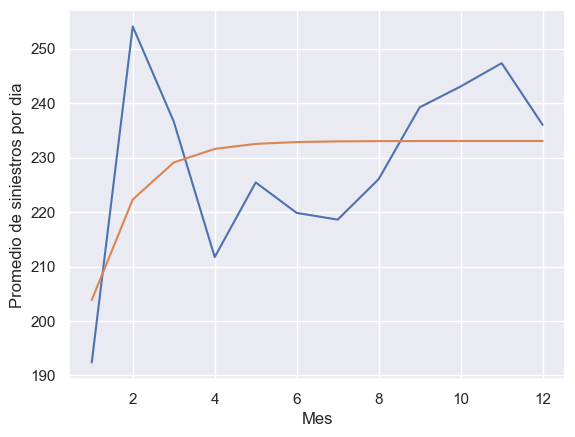

In [38]:
x = np.array(prom_año_total.index.values)
(a, b), pcov = curve_fit(exp_inv, x, prom_año_total.values)
print(f"f(x) = {a} - {b}*exp(x)")
y = exp_inv(x, a, b)
plt.plot(prom_año_total, label='Datos')
plt.plot(x, y, label='Ajuste')
plt.xlabel('Mes')
plt.ylabel('Promedio de siniestros por dia')

Este ajuste lo podemos aplicar para cada mes del año, y con esto obtenemos las tasas de siniestros diarios para cada uno de los meses, ademas esta tasa es el parametro de la distribucion de Poisson que determinara las probabilidades de ocurrencia de siniestros.

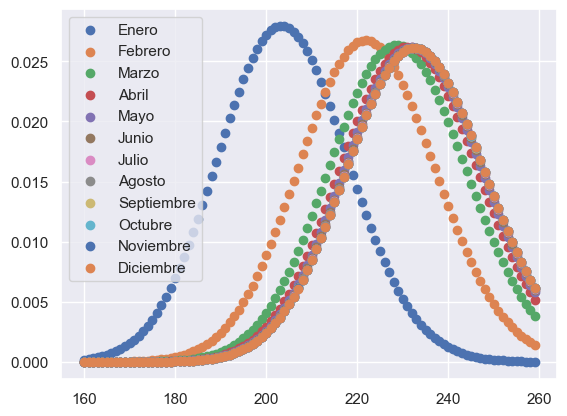

In [39]:
mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
k = lambda x: exp_inv(x, a, b)
for i in range(12):
    l = k(i+1)
    x = np.arange(160, 260, 1)
    y = poisson.pmf(x, mu = l)
    plt.scatter(x, y, label=mes[i])
plt.legend()

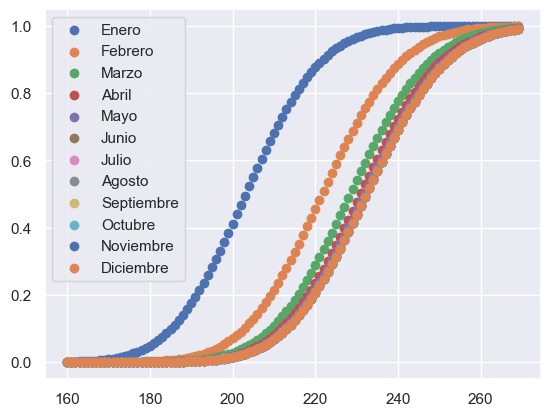

In [40]:
for i in range(12):
    l = k(i+1)
    x = np.arange(160, 270, 1)
    y = poisson.cdf(x, mu = l)
    plt.scatter(x, y, label=mes[i])
plt.legend()

#### Test de chi-cuadrado y correlacion tetracorica

Por otro lado, todas las variables presentes en el dataframe consisten de valores categoricos, es por esto que es ideal considerar tests de $\chi^2$ en matrices de contingencia y correlaciones de tetracoricas para dichas variables. Como se consideran dos variables categoricas, este tipo de test se hace bajo la siguiente hipotesis nula y alterna:
- $H_0$: Las variables son independientes entre si.
- $H_1$: Las variables son dependientes entre si.

Ademas, la correlacion tetracorica, usualmente denominada $r_{tet}$, utilizada para medir la tasa de relacion para datos binarios, nos indica que tan asociadas estan las propociones para dos variables. Para dos variables **A** y **B**, descritas por la matriz de contingencia:


|  | B | |
| --- | --- | ---  |
| A | a | b |
|  | c | d |

La correlacion esta dada por

$r_{tet} = \cos\left({\frac{\pi}{1+ \sqrt{\frac{bc}{ad}}}}\right)$.

 A partir de esto definimos las siguientes funciones:

In [41]:
def tetrachoric_corr(crosstab):
    """
    Calcula la correlacion tetracorica para una matriz de contingencia dada
    Parametros:
        crosstab: Una matriz de contingencia como dataframe.
    Retorna:
        Un valor flotante con el valor de la correlacion en la matriz.
    """
    [A, B], [C, D] = crosstab.values
    coef = 1 + (B*C / (A*D))
    return np.cos(np.pi/coef)

def chi_test(crosstab):
    """
    Evalua un test de chi cuadrado con hipotesis nula de independencia entre las variables,
    para la matriz de contigencia dada, y retorna el chi cuadarado, el p-value, y las propociones
    de las variables dadas.
    Parametros:
        crosstab: Una matriz de contingencia 2x2 como dataframe.
    Retorna:
        chi2: Chi cuadrado resultante del test.
        p_value: P-value resultante del test.
        prop_1: Proporcion entre la segunda y la primera fila la primera columna.
        prop_2: Proporcion entre la segunda y la primera fila la segunda columna.
    """
    chi2, p_value, gdl, expected = stats.chi2_contingency(crosstab)
    prop_1, prop_2 = crosstab.iloc[1,:]/crosstab.iloc[0,:]
    return chi2, p_value, prop_1, prop_2

def Chi_test(df, variable_1, variable_2, alpha=0.05):
    """
    Evalua un test de chi cuadrado con hipotesis nula de independencia entre las variables,
    para la matriz de contigencia nx2 dada, y retorna una cadena de texto indicando el resultado
    del test y las proporciones de las variables.
    Parametros:
        df: Dataframe con los datos.
        variable_1: Variable para introducir en la matriz de contingencia.
        variable_2: Variable para introducir en la matriz de contingencia
        alpha: Significancia del test.
    Retorna:
        resultado: Cadena de texto con toda la informacion de los tests.
    """
    nl = "\n"
    crosstab = pd.crosstab(df[variable_1], df[variable_2], margins=False)
    chi2, p_value, prop_1, prop_2 = chi_test(crosstab)
    if abs(p_value)>alpha:
        return f"Existen evidencia estadistica para no rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) de independencia entre las variables {variable_1} y {variable_2}."
    elif abs(p_value)<=alpha and crosstab.shape[0]==int(2):
        corr = tetrachoric_corr(crosstab)
        if prop_1<prop_2:
            return f"Existe evidencia estadistica para rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) de independecia.\n Ademas, una mayor proporcion de la variable {variable_1} con valor {crosstab.iloc[1,:].name} lo tiene el valor {crosstab.columns[1]} de la variable {variable_2} con una correlacion de {corr}."
        else:
            return f"Existe evidencia estadistica para rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) de independecia.\n Ademas, una mayor proporcion de la variable {variable_1} con valor {crosstab.iloc[1,:].name} lo tiene el valor {crosstab.columns[0]} de la variable {variable_2} con una correlacion de {corr}."
    elif abs(p_value)<=alpha and crosstab.shape[0]!=2:
        resultado = ''
        alpha = alpha / sp.special.comb(crosstab.shape[0], 2)
        dummies = pd.get_dummies(df[variable_1])
        for series in dummies:
            crosstab = pd.crosstab(dummies[series], df[variable_2], margins=False)
            chi2, p_value, prop_1, prop_2 = chi_test(crosstab)
            corr = tetrachoric_corr(crosstab)
            if abs(p_value)>alpha:
                resultado += f"Existe evidencia estadistica para no rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) del valor {crosstab.index.name} de la variable {variable_1}. {nl}"
            elif prop_1<prop_2:
                resultado += f"Existe evidencia estadistica para rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) y encontramos que una mayor propocion del valor {crosstab.index.name} de la variable {variable_1} la tiene el valor {crosstab.columns[1]} de la variable {variable_2} con una correlacion de {corr}. {nl}"
            else:
                resultado += f"Existe evidencia estadistica para rechazar la hipotesis nula (p-value = {p_value}, chi2 = {chi2}) y encontramos que una mayor propocion del valor {crosstab.index.name} de la variable {variable_1} la tiene el valor {crosstab.columns[0]} de la variable {variable_2} con una correlacion de {corr}. {nl}"
        return resultado



Las cuales son de gran utilidad ya que realizan dicho test y nos indican las propociones entre las variables.


En este caso consideraremos unicamente los datos de **SEXO** y **SERVICIO** contra **GRAVEDAD**, sin tener en cuenta los valores sin informacion para sexo y servicio, y los valores diferentes de publico o privado para el servicio. Esto lo almacenamos en los siguientes dataframes:

In [42]:
df_sexo = df_est[~(df_est.SEXO == 3)]
df_servicio = df_est.loc[(df.SERVICIO == 2) | (df.SERVICIO == 3)]

Estas elecciones son debido a que dichas variables descartadas, como se observa en las siguientes figuras, no son fuente de informacion o no aportan una cantidad significativa de datos

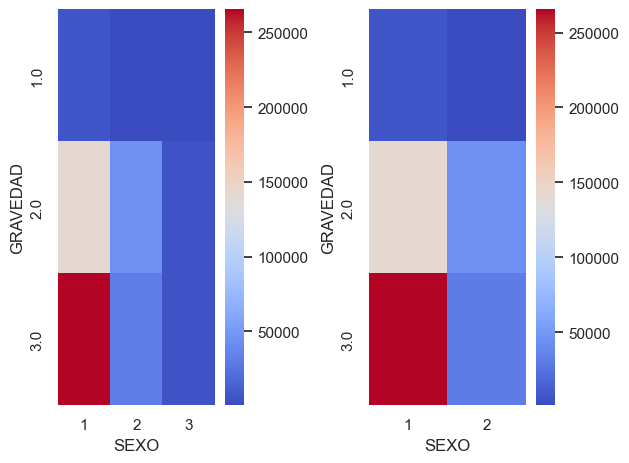

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.heatmap(ax=axes[0], data=pd.crosstab(df_est.GRAVEDAD, df_est.SEXO, margins=False), cmap='coolwarm')
sns.heatmap(ax=axes[1], data =pd.crosstab(df_sexo.GRAVEDAD, df_sexo.SEXO, margins=False), cmap='coolwarm')
fig.tight_layout()

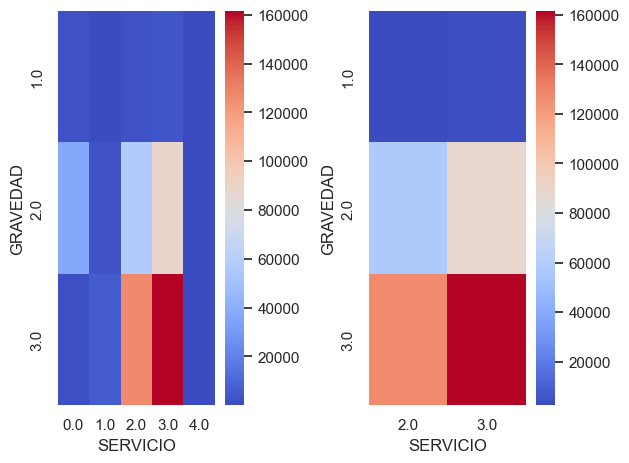

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.heatmap(ax=axes[0], data=pd.crosstab(df_est.GRAVEDAD, df_sexo.SERVICIO, margins=False), cmap='coolwarm')
sns.heatmap(ax=axes[1], data =pd.crosstab(df_servicio.GRAVEDAD, df_sexo.SERVICIO, margins=False), cmap='coolwarm')
plt.tight_layout()

Bajo estos nuevos dataframes procedemos a ejecutar los test para ambas variables **SEXO** y **SERVICIO** contra **GRAVEDAD**:

In [45]:
print(Chi_test(df_sexo, 'GRAVEDAD', 'SEXO'))

Existe evidencia estadistica para no rechazar la hipotesis nula (p-value = 0.17436090026696632, chi2 = 1.8450440700196005) del valor 1.0 de la variable GRAVEDAD. 
Existe evidencia estadistica para rechazar la hipotesis nula (p-value = 0.0, chi2 = 14783.32269231122) y encontramos que una mayor propocion del valor 2.0 de la variable GRAVEDAD la tiene el valor 2 de la variable SEXO con una correlacion de -0.6428735551965102. 
Existe evidencia estadistica para rechazar la hipotesis nula (p-value = 0.0, chi2 = 14640.530291719224) y encontramos que una mayor propocion del valor 3.0 de la variable GRAVEDAD la tiene el valor 1 de la variable SEXO con una correlacion de 0.6420714820123188. 



In [46]:
print(Chi_test(df_servicio, 'GRAVEDAD', 'SERVICIO'))

Existe evidencia estadistica para no rechazar la hipotesis nula (p-value = 0.0445179611106451, chi2 = 4.036807563751175) del valor 1.0 de la variable GRAVEDAD. 
Existe evidencia estadistica para rechazar la hipotesis nula (p-value = 2.591093787609529e-186, chi2 = 847.4613134334024) y encontramos que una mayor propocion del valor 2.0 de la variable GRAVEDAD la tiene el valor 3.0 de la variable SERVICIO con una correlacion de -0.14736877320069522. 
Existe evidencia estadistica para rechazar la hipotesis nula (p-value = 5.936655314934605e-189, chi2 = 859.6044983323969) y encontramos que una mayor propocion del valor 3.0 de la variable GRAVEDAD la tiene el valor 2.0 de la variable SERVICIO con una correlacion de 0.14691609536669523. 



Con esto concluimos que, en proporción, los hombres presentan mayores accidentes en cuanto a la gravedad de tipo "daño material" y por el contrario las mujeres en proporción presentan mayor accidentalidad de tipo "herido". Es por esto que para la empresa resulta favorable dedicar mayor publicidad a seguros por daño material a un publico masculino y mayor publicidad a seguros por heridas a publico femenino. También podemos concluir que el servicio privado tiene mayor proporcion en accidentes con heridos en comparación con el servicio público, y el servicion publico presenta mayor proporcionalidad en accidentes con daño material. Por lo tanto, al igual que el sexo, la publicidad para vehiculo particular se debe enfocar mas a seguros por daño por heridas.

# Autores

Este es un proyecto final realizado para el modulo 1 "Análisis y visualización de datos con Python" del diplomado modular "Machine learning and data science" ofrecido por la Universidad Nacional de Colombia.

Autores: Diego M. Lopez; Juan A. Guzman.

El dataframe preprocesado es exportado usando la siguiente funcion:

In [ ]:
def exportar_csv(df, nombre):
    """
    Exporta el dataframe indicado como un archivo de tipo csv.
    Parametros:
        df: Dataframe a exportar como csv.
        nombre: Cadena de texto con el nombre del archivo generado
    Retorna:
        El texto 'Procedimiento exitoso' si se ejecuto correctamiente.
    """
    df.to_csv(nombre+'.csv')
    return 'Procedimiento exitoso'

exportar_csv(df, 'siniestros_viales')